In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


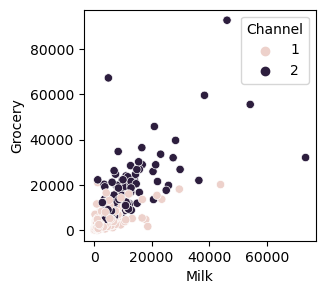

In [5]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')
plt.show();

<Axes: xlabel='Milk', ylabel='Count'>

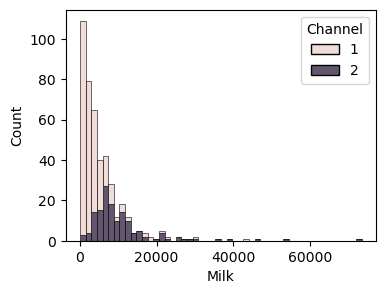

In [6]:
plt.figure(figsize=(4,3), dpi=100)
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack')

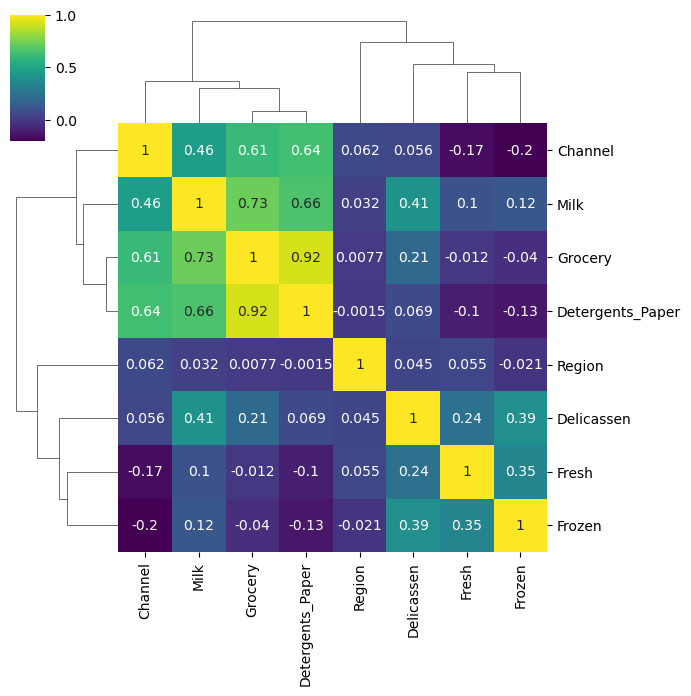

In [7]:
sns.clustermap(data=df.corr(), annot=True, cmap='viridis', figsize=(7,7))

/Users/arnav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


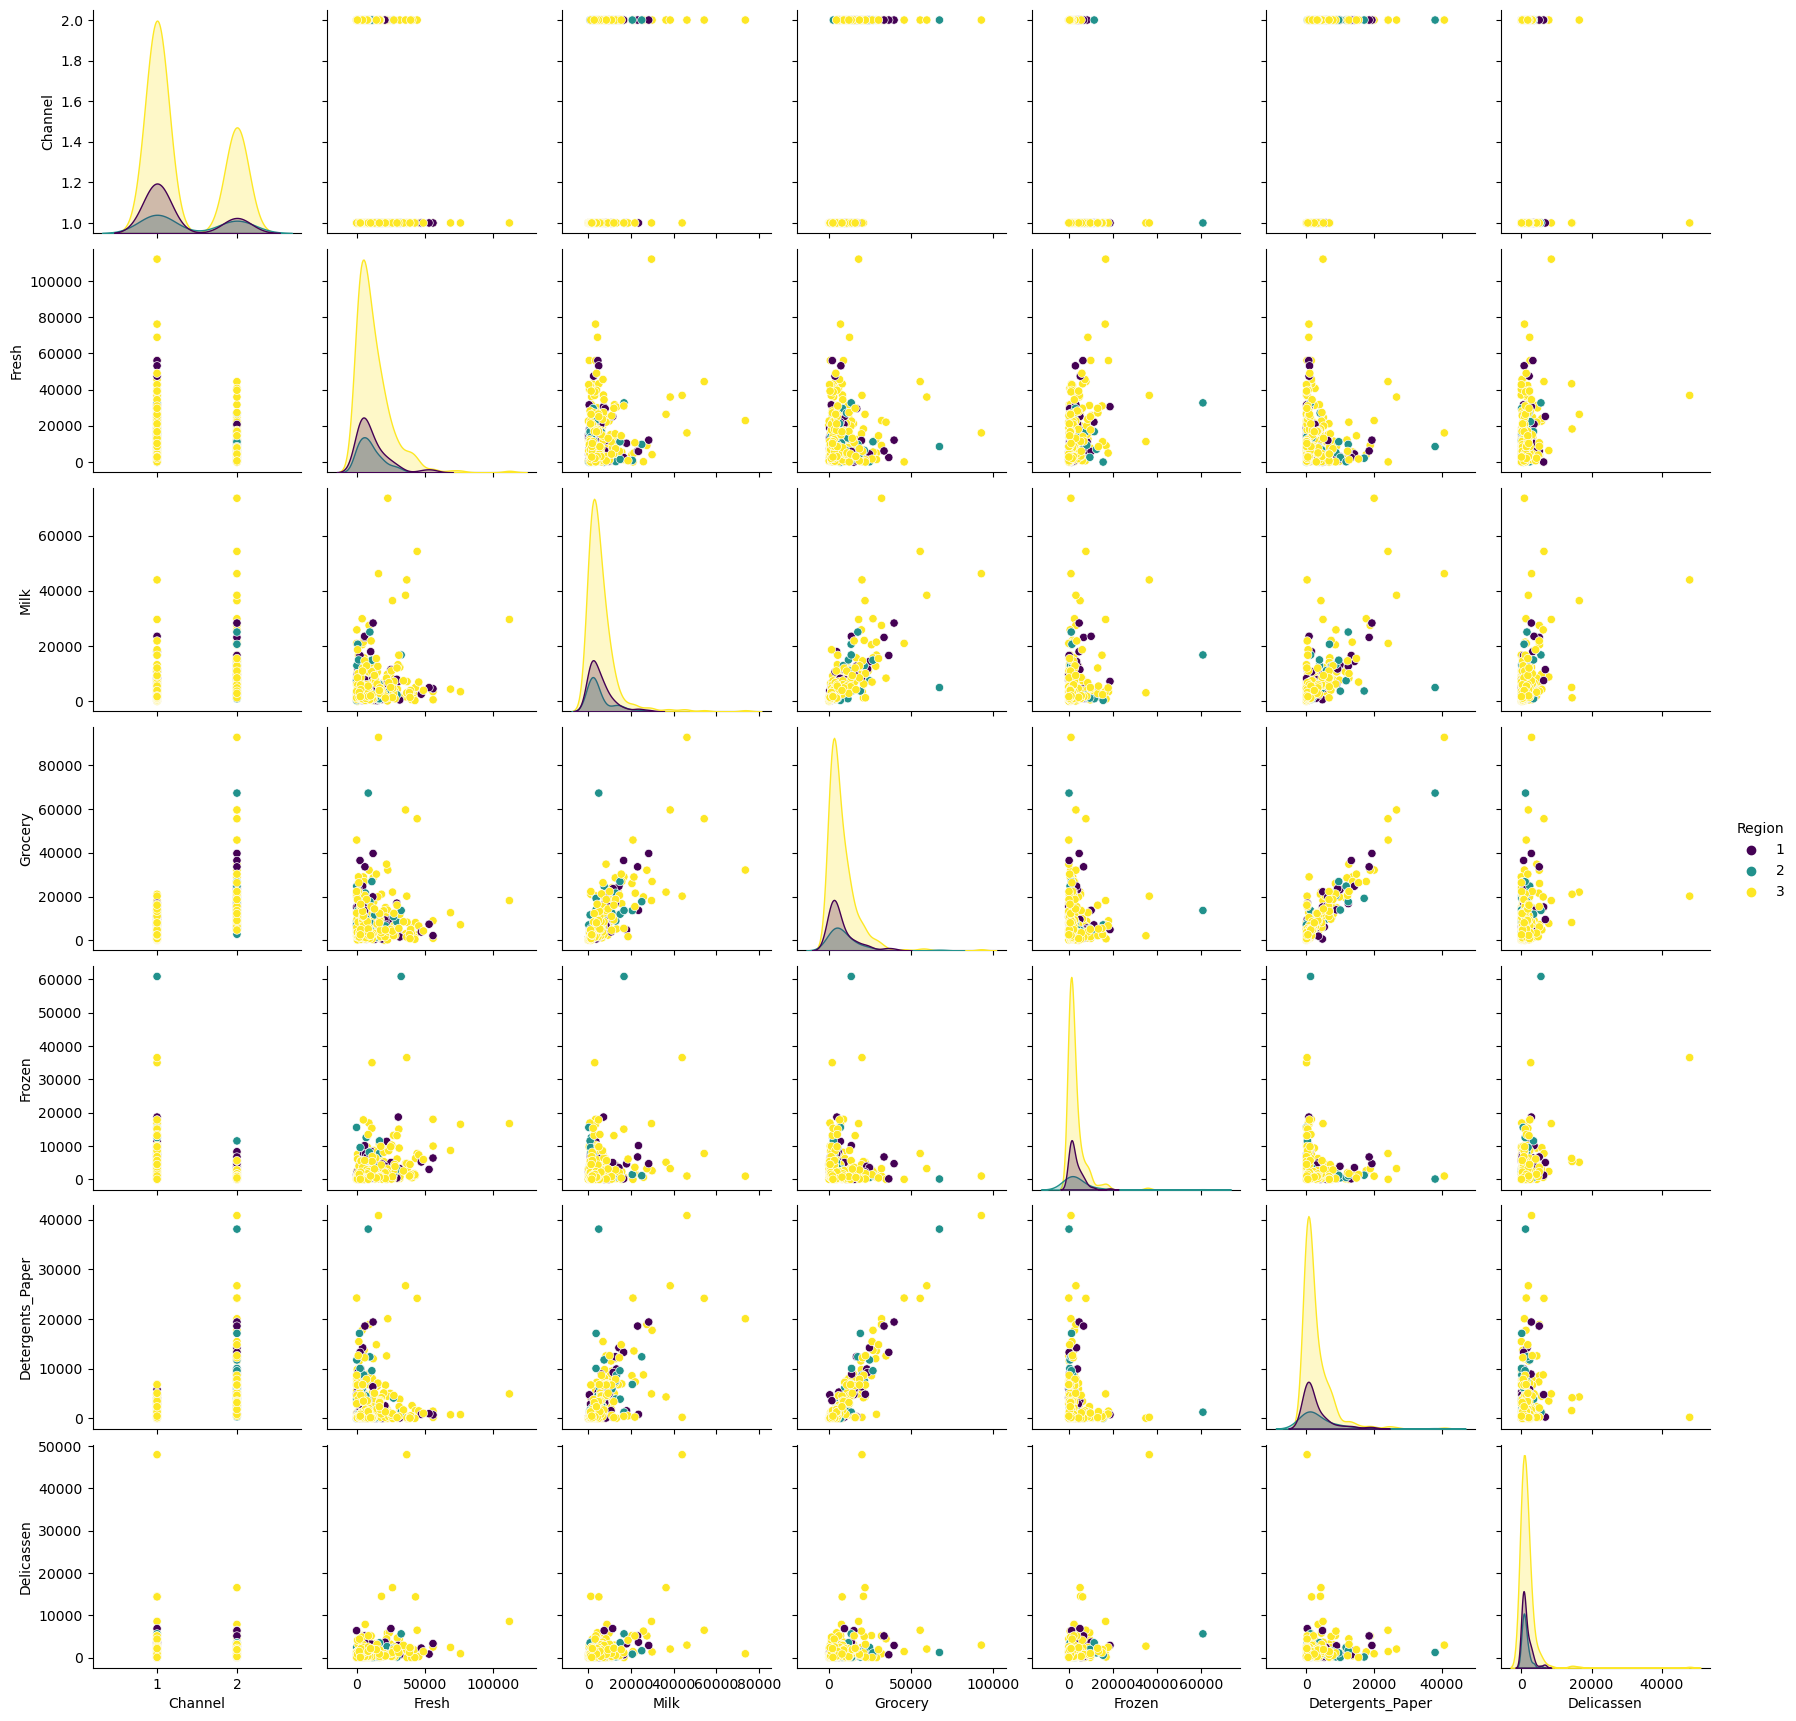

In [8]:
sns.pairplot(df, hue='Region', palette='viridis')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [11]:
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [12]:
from sklearn.cluster import DBSCAN

In [13]:
percent = []

for eps in np.linspace(0.001,3,50):
    model = DBSCAN(eps=eps, min_samples=2*len(df.columns))
    model.fit(scaled_df)
    pers = np.sum(model.labels_ == -1)*100/len(model.labels_)
    percent.append(pers)

In [14]:
percent

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 96.13636363636364,
 85.68181818181819,
 81.81818181818181,
 76.36363636363636,
 73.63636363636364,
 70.45454545454545,
 65.0,
 56.81818181818182,
 47.95454545454545,
 39.54545454545455,
 32.5,
 27.954545454545453,
 24.545454545454547,
 22.272727272727273,
 20.90909090909091,
 20.227272727272727,
 19.318181818181817,
 17.954545454545453,
 15.0,
 14.318181818181818,
 12.5,
 10.681818181818182,
 10.227272727272727,
 8.181818181818182,
 7.7272727272727275,
 7.045454545454546,
 6.590909090909091,
 6.136363636363637,
 5.2272727272727275,
 4.7727272727272725,
 4.7727272727272725,
 4.545454545454546,
 4.090909090909091,
 3.8636363636363638,
 3.6363636363636362,
 3.6363636363636362,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 2.9545454545454546,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727]

Text(0.5, 0, 'epsilon')

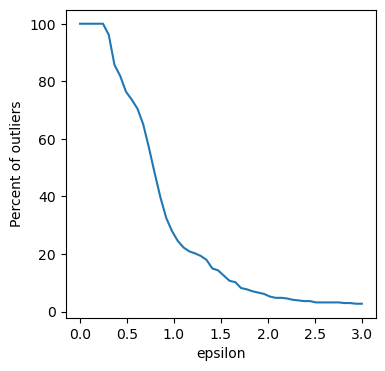

In [15]:
plt.figure(figsize=(4,4),dpi=100)
sns.lineplot(x=np.linspace(0.001,3,50), y=percent)
plt.ylabel('Percent of outliers')
plt.xlabel('epsilon')

In [16]:
model = DBSCAN(eps=2)

In [17]:
labels = model.fit_predict(scaled_df)

<Axes: xlabel='Grocery', ylabel='Milk'>

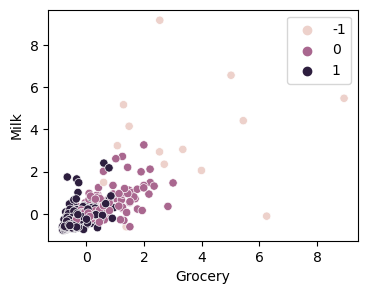

In [18]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=scaled_df, x='Grocery', y='Milk', hue=labels)

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

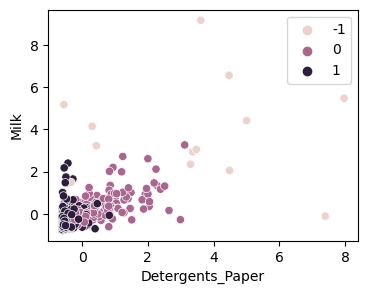

In [19]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=scaled_df, x='Detergents_Paper', y='Milk', hue=labels)

In [20]:
df['Labels'] = labels

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [22]:
grouped = df.drop(['Channel','Region'], axis=1).groupby('Labels')

In [23]:
gpd = grouped.mean()

In [24]:
gpd

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
data = scaler.fit_transform(gpd)

In [27]:
scaled_means = pd.DataFrame(data, index = gpd.index, columns = gpd.columns)

In [28]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<Axes: ylabel='Labels'>

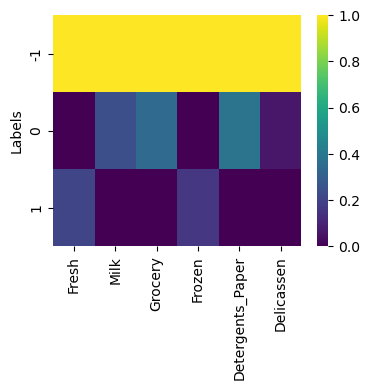

In [29]:
plt.figure(figsize=(4,3))
sns.heatmap(scaled_means, cmap='viridis')

<Axes: ylabel='Labels'>

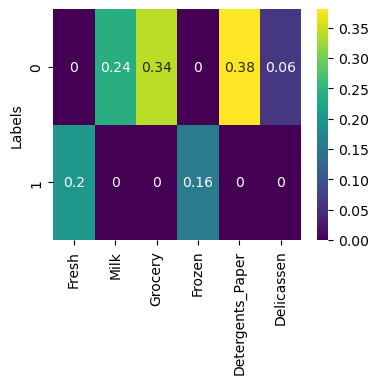

In [30]:
plt.figure(figsize=(4,3))
sns.heatmap(scaled_means[1:], annot=True, cmap='viridis')